In [1]:
import numpy as np
from pandas import Series
import seaborn as sns
import pandas as pd #the csv reading library
import matplotlib.pyplot as plt #the ploting library
import glob #to get file names
import scipy.optimize
from scipy.optimize import curve_fit
from scipy import interpolate
from scipy.interpolate import pchip_interpolate
import math
from pandas import Series
from lmfit import Model, Parameter, report_fit
import scipy.ndimage
from scipy.ndimage import gaussian_filter1d
from scipy.signal import savgol_filter
from numpy import ones,vstack
from numpy.linalg import lstsq

In [2]:
#make the last 

files = glob.glob('../Dissertation_projects/Data/CNS/FINAL_DATA/*.xlsx')

for f in files: 
    read_file = pd.read_excel (f, sheet_name='Sheet1')
    name = f[:-5]
    read_file.to_csv (name + ".csv", index = None, header=True)
    
#make the new files list the csv files much safer
files = glob.glob('../Dissertation_projects/Data/CNS/FINAL_DATA/*.csv')
files

['../Dissertation_projects/Data/CNS/FINAL_DATA\\ST.11_FALL2021.csv',
 '../Dissertation_projects/Data/CNS/FINAL_DATA\\ST.14_FALL2021.csv',
 '../Dissertation_projects/Data/CNS/FINAL_DATA\\ST.14_SPRING2022.csv',
 '../Dissertation_projects/Data/CNS/FINAL_DATA\\ST.2_FALL2021.csv',
 '../Dissertation_projects/Data/CNS/FINAL_DATA\\ST.2_SPRING2022.csv',
 '../Dissertation_projects/Data/CNS/FINAL_DATA\\ST.2_SUMMER2022.csv',
 '../Dissertation_projects/Data/CNS/FINAL_DATA\\ST.5B_FALL2021.csv',
 '../Dissertation_projects/Data/CNS/FINAL_DATA\\ST.5B_SPRING2022.csv',
 '../Dissertation_projects/Data/CNS/FINAL_DATA\\ST.7_FALL2021.csv',
 '../Dissertation_projects/Data/CNS/FINAL_DATA\\ST.7_SPRING2022.csv',
 '../Dissertation_projects/Data/CNS/FINAL_DATA\\ST.9_FALL2021.csv',
 '../Dissertation_projects/Data/CNS/FINAL_DATA\\ST.9_SPRING2022.csv']

In [3]:
#make function 
def GET_DATA(name):
    df = pd.read_csv(name, sep=',', index_col=0)
    df = pd.DataFrame(df)
    return df

frames = []
for f in files:
    df = GET_DATA(f) # runs the processing function  
    frames.append(df) # adds the new col from each scan to a part of frames 
df = pd.concat(frames, axis=0, ignore_index=False)

df

Station     Trip  Porosity  Depth_CM  OC_tube  OC_Tube_Full  \
ID                                                               
1    St.11  GOM21FA  0.926658      0.25   3.0629        3.1370   
2    St.11  GOM21FA  0.905162      0.75   3.0975        3.1984   
3    St.11  GOM21FA  0.905085      1.25   3.0679        3.1148   
4    St.11  GOM21FA  0.894661      1.75   3.0666        3.1281   
5    St.11  GOM21FA  0.890890      2.25   3.1050        3.1467   
..     ...      ...       ...       ...      ...           ...   
20    St.9  GOM22SP  0.775405     14.50   3.0833        3.1921   
25    St.9  GOM22SP  0.712235     19.50   3.1174        3.2235   
28    St.9  GOM22SP  0.682884     25.00   3.1009        3.2417   
31    St.9  GOM22SP  0.716122     32.00   3.1231        3.1726   
32    St.9  GOM22SP  0.743374     36.00   3.1227        3.2080   

    OC_Tube_Post_HCL  OC_FULL  OC_POST_HCL     Wf/Wo       TN%       TC%  \
ID                                                                         
1             3.1598   0.0741       0.0969  1.307692  0.188199  1.934575   
2             3.2188   0.1009       0.1213  1.202180  0.190637  1.882505   
3             3.1236   0.0469       0.0557  1.187633  0.195553  1.873997   
4             3.1385   0.0615       0.0719  1.169106  0.168884  1.758187   
5             3.1538   0.0417       0.0488  1.170264  0.178660  1.693657   
..               ...      ...          ...       ...       ...       ...   
20            3.1966   0.1088       0.1133  1.041360  0.183159  1.534273   
25            3.2280   0.1061       0.1106  1.042413  0.172862  1.489465   
28            3.2480   0.1408       0.1471  1.044744  0.126242  1.304782   
31            3.1758   0.0495       0.0527  1.064646  0.154906  1.437700   
32            3.2192   0.0853       0.0965  1.131301  0.210649  1.441028   

         TS%  ON%_mesured  OC%_mesured  OS%_mesured       ON%       IN%  \
ID                                                                        
1   0.030193     0.135034     0.868314     0.159005  0.176583  0.011616   
2   0.073269     0.145712     0.928393     0.222654  0.175172  0.015464   
3   0.041674     0.138553     0.900826     0.141942  0.164550  0.031003   
4   0.062916     0.132988     0.902882     0.176013  0.155477  0.013408   
5   0.078806     0.136315     0.891006     0.163414  0.159525  0.019136   
..       ...          ...          ...          ...       ...       ...   
20  0.082914     0.153295     1.023779     0.067898  0.159636  0.023523   
25  0.104794     0.135413     1.000184     0.067817  0.141156  0.031706   
28  0.207836     0.117243     0.848217     0.060952  0.122489  0.003753   
31  0.268816     0.149530     0.922444     0.066562  0.159196 -0.004290   
32  0.174843     0.127885     0.965181     0.115929  0.144676  0.065973   

         OC%       IC%  
ID                      
1   1.135488  0.799087  
2   1.116096  0.766409  
3   1.069850  0.804147  
4   1.055565  0.702622  
5   1.042712  0.650946  
..       ...       ...  
20  1.066123  0.468151  
25  1.042605  0.446860  
28  0.886169  0.418613  
31  0.982077  0.455623  
32  1.091910  0.349118  

[230 rows x 20 columns]

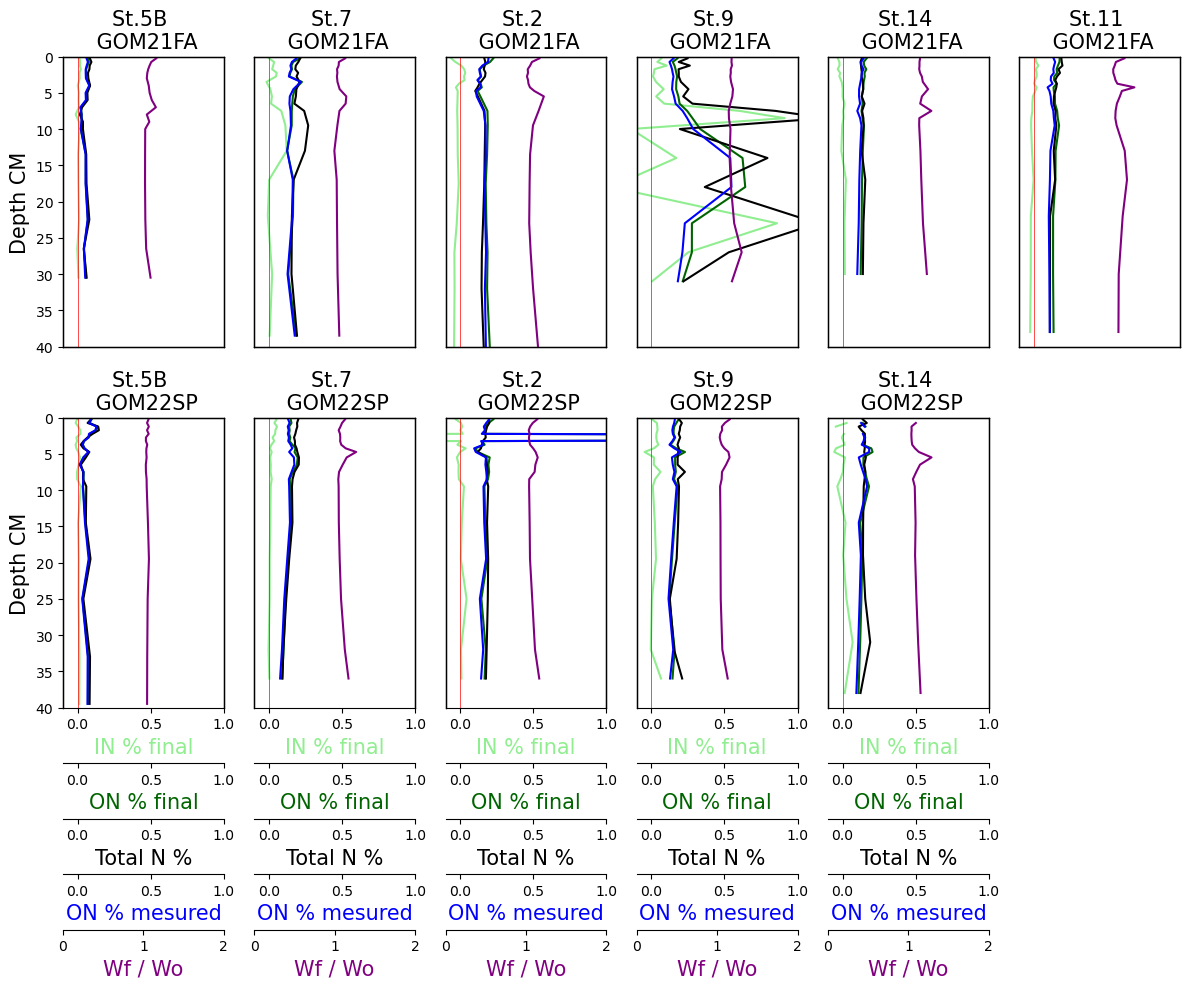

In [4]:
stations = ['St.5B','St.7','St.2','St.9','St.14','St.11']
trips = ['GOM21FA','GOM22SP']


fig, axes = plt.subplots(len(trips), len(stations), figsize=(len(stations)*2, len(trips)*5))

for i, trip in enumerate(trips):
    for j, station in enumerate(stations):
        # Filter by trip and station
        sub_df = df[(df['Trip'] == trip) & (df['Station'] == station)]
        
        if not sub_df.empty:
            
            ax = axes[i, j]
            
            ax.plot(sub_df['IN%'], sub_df['Depth_CM'], c = 'lightgreen')
            ax.set_title(f'{station} \n {trip}', size =15)
            ax.set_ylim(40,0)
            ax.set_xlim(-.1,1)
            ax.axvline(linewidth=.5, color='r')
            
            ax2 = ax.twiny()
            ax2.plot(sub_df['ON%'], sub_df['Depth_CM'], c = 'darkgreen')
            ax2.set_ylim(40,0)
            ax2.set_xlim(-.1,1)
            
            ax3 = ax.twiny()
            ax3.plot(sub_df['TN%'], sub_df['Depth_CM'], c = 'black')
            ax3.set_ylim(40,0)
            ax3.set_xlim(-.1,1)
            
            ax4 = ax.twiny()
            ax4.plot(sub_df['ON%_mesured'], sub_df['Depth_CM'], c = 'blue')
            ax4.set_ylim(40,0)
            ax4.set_xlim(-.1,1)
            
            ax5 = ax.twiny()
            ax5.plot(sub_df['Wf/Wo'], sub_df['Depth_CM'], c = 'purple')
            ax5.set_ylim(40,0)
            ax5.set_xlim(0,2)
        
        else: 
            axes[i, j].axis('off')  
        if j == 0:
            axes[i,j].set_ylabel('Depth CM', size=15, c='black')
            axes[i,j].yaxis.set_tick_params(labelsize=10)
        else: 
            ax.set_ylabel('')
            ax.yaxis.set_ticklabels([])
            ax.set_yticks([])
        
        if i == 1:
            ax.set_xlabel('IN % final', size=15, c='lightgreen')
            ax.xaxis.set_tick_params(labelsize=10)
            
            ax2.set_xlabel('ON % final', size = 15, c= 'darkgreen')
            ax2.xaxis.set_ticks_position('bottom')
            ax2.xaxis.set_label_position('bottom')
            ax2.spines['bottom'].set_position(('outward', 40))
            
            ax3.set_xlabel('Total N %', size = 15, c= 'black')
            ax3.xaxis.set_ticks_position('bottom')
            ax3.xaxis.set_label_position('bottom')
            ax3.spines['bottom'].set_position(('outward', 80))
            
            ax4.set_xlabel('ON % mesured', size = 15, c= 'blue')
            ax4.xaxis.set_ticks_position('bottom')
            ax4.xaxis.set_label_position('bottom')
            ax4.spines['bottom'].set_position(('outward', 120))
            
            ax5.set_xlabel('Wf / Wo', size = 15, c= 'purple')
            ax5.xaxis.set_ticks_position('bottom')
            ax5.xaxis.set_label_position('bottom')
            ax5.spines['bottom'].set_position(('outward', 160))
            
        else: 
            ax.set_xlabel('')
            ax.xaxis.set_ticklabels([])
            ax.set_xticks([])
            
            ax2.set_xlabel('')
            ax2.xaxis.set_ticklabels([])
            ax2.set_xticks([])
            
            ax3.set_xlabel('')
            ax3.xaxis.set_ticklabels([])
            ax3.set_xticks([])
            
            ax4.set_xlabel('')
            ax4.xaxis.set_ticklabels([])
            ax4.set_xticks([])
            
            ax5.set_xlabel('')
            ax5.xaxis.set_ticklabels([])
            ax5.set_xticks([])
        

plt.tight_layout()
fig.set_facecolor('w')
plt.show()

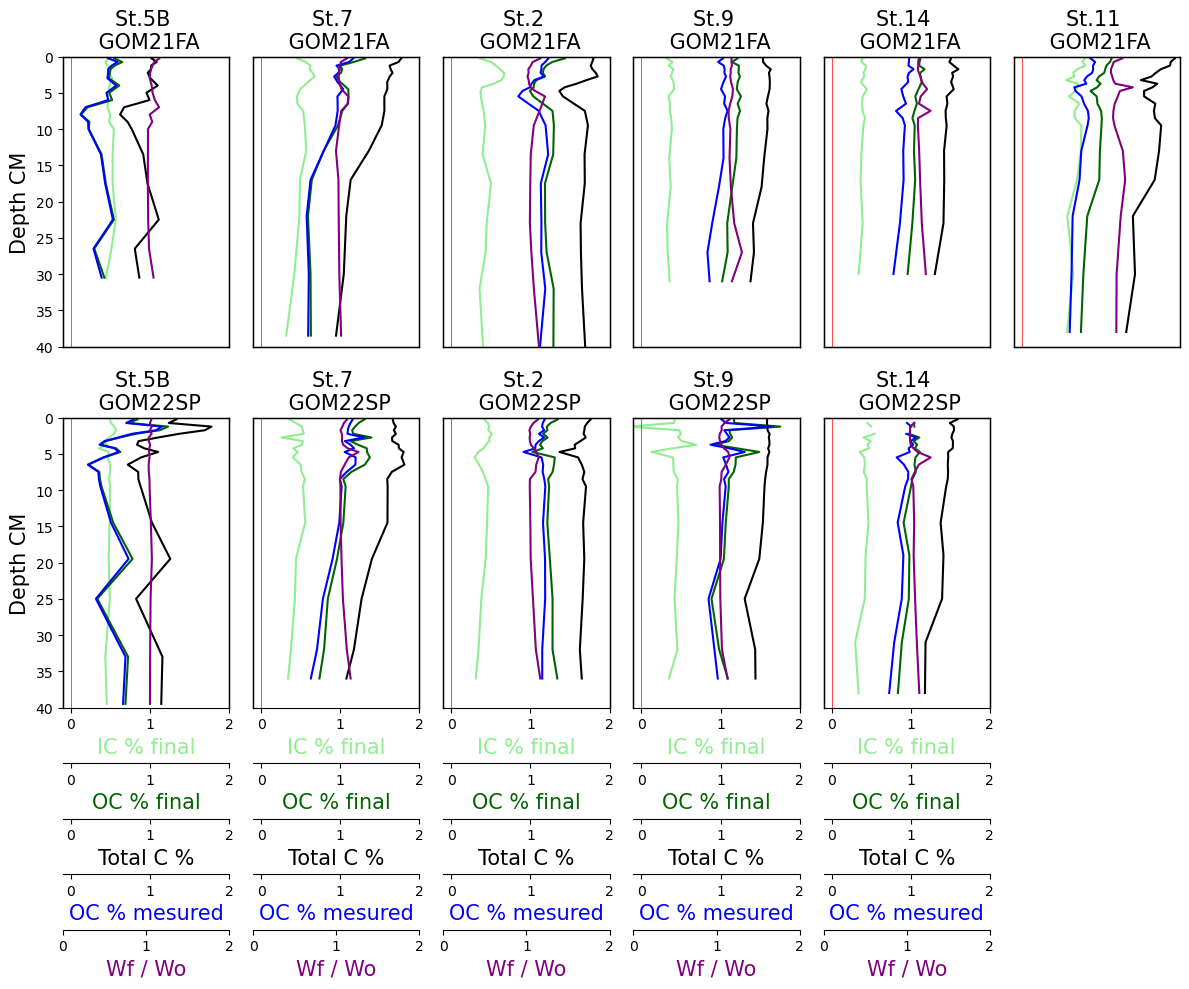

In [5]:

fig, axes = plt.subplots(len(trips), len(stations), figsize=(len(stations)*2, len(trips)*5))

for i, trip in enumerate(trips):
    for j, station in enumerate(stations):
        # Filter by trip and station
        sub_df = df[(df['Trip'] == trip) & (df['Station'] == station)]
        
        if not sub_df.empty:
            
            ax = axes[i, j]
            
            ax.plot(sub_df['IC%'], sub_df['Depth_CM'], c = 'lightgreen')
            ax.set_title(f'{station} \n {trip}', size =15)
            ax.set_ylim(40,0)
            ax.set_xlim(-.1,2)
            ax.axvline(linewidth=.5, color='r')
            
            ax2 = ax.twiny()
            ax2.plot(sub_df['OC%'], sub_df['Depth_CM'], c = 'darkgreen')
            ax2.set_ylim(40,0)
            ax2.set_xlim(-.1,2)
            
            ax3 = ax.twiny()
            ax3.plot(sub_df['TC%'], sub_df['Depth_CM'], c = 'black')
            ax3.set_ylim(40,0)
            ax3.set_xlim(-.1,2)
            
            ax4 = ax.twiny()
            ax4.plot(sub_df['OC%_mesured'], sub_df['Depth_CM'], c = 'blue')
            ax4.set_ylim(40,0)
            ax4.set_xlim(-.1,2)
            
            ax5 = ax.twiny()
            ax5.plot(sub_df['Wf/Wo'], sub_df['Depth_CM'], c = 'purple')
            ax5.set_ylim(40,0)
            ax5.set_xlim(0,2)
        
        else: 
            axes[i, j].axis('off')  
        if j == 0:
            axes[i,j].set_ylabel('Depth CM', size=15, c='black')
            axes[i,j].yaxis.set_tick_params(labelsize=10)
        else: 
            ax.set_ylabel('')
            ax.yaxis.set_ticklabels([])
            ax.set_yticks([])
        
        if i == 1:
            ax.set_xlabel('IC % final', size=15, c='lightgreen')
            ax.xaxis.set_tick_params(labelsize=10)
            
            ax2.set_xlabel('OC % final', size = 15, c= 'darkgreen')
            ax2.xaxis.set_ticks_position('bottom')
            ax2.xaxis.set_label_position('bottom')
            ax2.spines['bottom'].set_position(('outward', 40))
            
            ax3.set_xlabel('Total C %', size = 15, c= 'black')
            ax3.xaxis.set_ticks_position('bottom')
            ax3.xaxis.set_label_position('bottom')
            ax3.spines['bottom'].set_position(('outward', 80))
            
            ax4.set_xlabel('OC % mesured', size = 15, c= 'blue')
            ax4.xaxis.set_ticks_position('bottom')
            ax4.xaxis.set_label_position('bottom')
            ax4.spines['bottom'].set_position(('outward', 120))
            
            ax5.set_xlabel('Wf / Wo', size = 15, c= 'purple')
            ax5.xaxis.set_ticks_position('bottom')
            ax5.xaxis.set_label_position('bottom')
            ax5.spines['bottom'].set_position(('outward', 160))
        else: 
            ax.set_xlabel('')
            ax.xaxis.set_ticklabels([])
            ax.set_xticks([])
            
            ax2.set_xlabel('')
            ax2.xaxis.set_ticklabels([])
            ax2.set_xticks([])
            
            ax3.set_xlabel('')
            ax3.xaxis.set_ticklabels([])
            ax3.set_xticks([])
            
            ax4.set_xlabel('')
            ax4.xaxis.set_ticklabels([])
            ax4.set_xticks([])
            
            ax5.set_xlabel('')
            ax5.xaxis.set_ticklabels([])
            ax5.set_xticks([])
        

plt.tight_layout()
fig.set_facecolor('w')
plt.show()

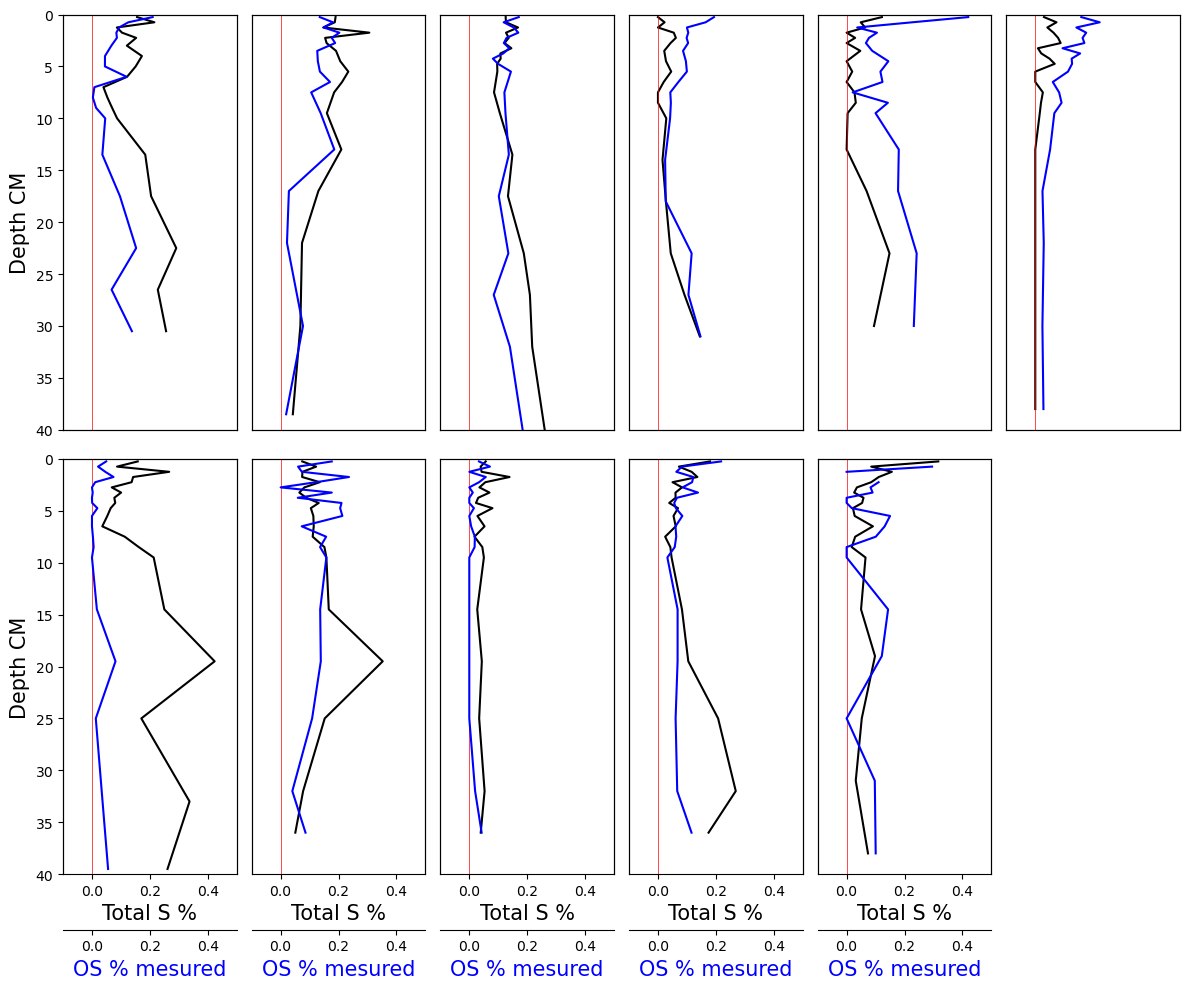

In [8]:

fig, axes = plt.subplots(len(trips), len(stations), figsize=(len(stations)*2, len(trips)*5))

for i, trip in enumerate(trips):
    for j, station in enumerate(stations):
        # Filter by trip and station
        sub_df = df[(df['Trip'] == trip) & (df['Station'] == station)]
        
        if not sub_df.empty:
            
            ax = axes[i, j]
            
            ax.plot(sub_df['TS%'], sub_df['Depth_CM'], c = 'black')
            ax.set_ylim(40,0)
            ax.set_xlim(-.1,.5)
            ax.axvline(linewidth=.5, color='r')

            
            ax4 = ax.twiny()
            ax4.plot(sub_df['OS%_mesured'], sub_df['Depth_CM'], c = 'blue')
            ax4.set_ylim(40,0)
            ax4.set_xlim(-.1,.5)
        
        else: 
            axes[i, j].axis('off')  
        if j == 0:
            axes[i,j].set_ylabel('Depth CM', size=15, c='black')
            axes[i,j].yaxis.set_tick_params(labelsize=10)
        else: 
            ax.set_ylabel('')
            ax.yaxis.set_ticklabels([])
            ax.set_yticks([])
        
        if i == 1:
            ax.set_xlabel('Total S %', size=15, c='black')
            ax.xaxis.set_tick_params(labelsize=10)
            
            ax4.set_xlabel('OS % mesured', size = 15, c= 'blue')
            ax4.xaxis.set_ticks_position('bottom')
            ax4.xaxis.set_label_position('bottom')
            ax4.spines['bottom'].set_position(('outward', 40))
            
        else: 
            ax.set_xlabel('')
            ax.xaxis.set_ticklabels([])
            ax.set_xticks([])
            
            
            ax4.set_xlabel('')
            ax4.xaxis.set_ticklabels([])
            ax4.set_xticks([])
            

plt.tight_layout()
fig.set_facecolor('w')
plt.show()

In [7]:
XXX

NameError: name 'XXX' is not defined

In [ ]:
stations = ['St.5B','St.7','St.2','St.9','St.14','St.11']
trips = ['GOM21FA','GOM22SP']


fig, axes = plt.subplots(len(trips), len(stations), figsize=(len(stations)*2, len(trips)*4))

for i, trip in enumerate(trips):
    for j, station in enumerate(stations):
        # Filter by trip and station
        sub_df = df[(df['Trip'] == trip) & (df['Station'] == station)]
        
        if not sub_df.empty:
            axes[i, j].plot(sub_df['IC%'], sub_df['Depth_CM'], c = 'lightblue')
            axes[i, j].plot(sub_df['OC%'], sub_df['Depth_CM'], c = 'darkblue')
        
            axes[i, j].set_title(f'{station} \n {trip}', size =15)
        
            axes[i, j].set_ylim(40,0)
            axes[i, j].set_xlim(-.1,2)
            axes[i, j].axvline(linewidth=.25, color='r')
        
        else: 
            axes[i, j].axis('off')  
        if j == 0:
            axes[i,j].set_ylabel('Depth CM', size=15, c='black')
            axes[i,j].yaxis.set_tick_params(labelsize=10)
        else: 
            axes[i,j].set_ylabel('')
            axes[i,j].yaxis.set_ticklabels([])
            axes[i,j].set_yticks([])
        
        if i == 1:
            axes[i,j].set_xlabel('OC %', size=15, c='darkblue')
            axes[i,j].set_xlabel('IC %', size=15, c='lightblue')
            axes[i,j].xaxis.set_tick_params(labelsize=10)
        else: 
            axes[i,j].set_xlabel('')
            axes[i,j].xaxis.set_ticklabels([])
            axes[i,j].set_xticks([])
        

plt.tight_layout()
fig.set_facecolor('w')
plt.show()

In [ ]:
stations = ['St.5B','St.7','St.2','St.9','St.14','St.11']
trips = ['GOM21FA','GOM22SP']


fig, axes = plt.subplots(len(trips), len(stations), figsize=(len(stations)*2, len(trips)*4))

for i, trip in enumerate(trips):
    for j, station in enumerate(stations):
        # Filter by trip and station
        sub_df = df[(df['Trip'] == trip) & (df['Station'] == station)]
        
        if not sub_df.empty:
            axes[i, j].plot(sub_df['IN%'], sub_df['Depth_CM'], c = 'lightgreen')
            axes[i, j].plot(sub_df['ON%'], sub_df['Depth_CM'], c = 'darkgreen')
        
            axes[i, j].set_title(f'{station} \n {trip}', size =15)
        
            axes[i, j].set_ylim(40,0)
            axes[i, j].set_xlim(-.1,1)
            axes[i, j].axvline(linewidth=.25, color='r')
        
        else: 
            axes[i, j].axis('off')  
        if j == 0:
            axes[i,j].set_ylabel('Depth CM', size=15, c='black')
            axes[i,j].yaxis.set_tick_params(labelsize=10)
        else: 
            axes[i,j].set_ylabel('')
            axes[i,j].yaxis.set_ticklabels([])
            axes[i,j].set_yticks([])
        
        if i == 3:
            axes[i,j].set_xlabel('IN %', size=15, c='black')
            axes[i,j].xaxis.set_tick_params(labelsize=10)
        else: 
            axes[i,j].set_xlabel('')
            axes[i,j].xaxis.set_ticklabels([])
            axes[i,j].set_xticks([])
        

plt.tight_layout()
fig.set_facecolor('w')
plt.show()

In [ ]:
stations = ['St.5B','St.7','St.2','St.9','St.14','St.11']

fig, axes = plt.subplots(1, len(stations), figsize=(6,6))
for j, station in enumerate(stations):
    sub_df = df[df['Station'] == station]

    axes[j].plot(sub_df['IN%'], sub_df['Depth_CM'])
    
    if j == 0:
        axes[j].set_ylabel(r'Depth CM', size=10, c='black')
        axes[j].yaxis.set_tick_params(labelsize=10)
    else: 
        axes[j].set_ylabel('')
        axes[j].yaxis.set_ticklabels([])
        axes[j].set_yticks([])
    
    axes[j].set_ylim(40,0)
    axes[j].set_xlim(-.1,1)
    
    axes[j].set_xlabel('IN %', size=10, c='black')
    
    axes[j].set_title(f'{station}', size = 10) 
    
    axes[j].axvline(linewidth=.5, color='r')


In [ ]:
stations = ['St.5B','St.7','St.2','St.9','St.14','St.11']

val = 'ON%'

fig, axes = plt.subplots(1, len(stations), figsize=(6,6))
for j, station in enumerate(stations):
    sub_df = df[df['Station'] == station]

    axes[j].plot(sub_df[val], sub_df['Depth_CM'])
    
    if j == 0:
        axes[j].set_ylabel(r'Depth CM', size=10, c='black')
        axes[j].yaxis.set_tick_params(labelsize=10)
    else: 
        axes[j].set_ylabel('')
        axes[j].yaxis.set_ticklabels([])
        axes[j].set_yticks([])
    
    axes[j].set_ylim(40,0)
    axes[j].set_xlim(0,1)
    
    axes[j].set_xlabel(f'{val}', size=10, c='black')
    
    axes[j].set_title(f'{station}', size = 10) 


In [ ]:
stations = ['St.5B','St.7','St.2','St.9','St.14','St.11']

val = 'IC%'

fig, axes = plt.subplots(1, len(stations), figsize=(6,6))
for j, station in enumerate(stations):
    sub_df = df[df['Station'] == station]

    axes[j].plot(sub_df[val], sub_df['Depth_CM'])
    
    if j == 0:
        axes[j].set_ylabel(r'Depth CM', size=10, c='black')
        axes[j].yaxis.set_tick_params(labelsize=10)
    else: 
        axes[j].set_ylabel('')
        axes[j].yaxis.set_ticklabels([])
        axes[j].set_yticks([])
    
    axes[j].set_ylim(40,0)
    axes[j].set_xlim(0,1)
    
    axes[j].set_xlabel(f'{val}', size=10, c='black')
    
    axes[j].set_title(f'{station}', size = 10) 


In [ ]:
stations = ['St.5B','St.7','St.2','St.9','St.14','St.11']

val = 'OC%'

fig, axes = plt.subplots(1, len(stations), figsize=(6,6))
for j, station in enumerate(stations):
    sub_df = df[df['Station'] == station]

    axes[j].plot(sub_df[val], sub_df['Depth_CM'])
    
    if j == 0:
        axes[j].set_ylabel(r'Depth CM', size=10, c='black')
        axes[j].yaxis.set_tick_params(labelsize=10)
    else: 
        axes[j].set_ylabel('')
        axes[j].yaxis.set_ticklabels([])
        axes[j].set_yticks([])
    
    axes[j].set_ylim(40,0)
    axes[j].set_xlim(0,1.5)
    
    axes[j].set_xlabel(f'{val}', size=10, c='black')
    
    axes[j].set_title(f'{station}', size = 10) 
